In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -q -U watermark

In [ ]:
!pip install -qq transformers

In [ ]:
import transformers  # Library for handling transformers-based models (such as BERT)
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup  # Specific modules from transformers
import torch  # PyTorch library for deep learning

import numpy as np  # Library for numerical computations
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Statistical data visualization library
from pylab import rcParams  # Library for customizing matplotlib parameters
import matplotlib.pyplot as plt  # Library for plotting
from matplotlib import rc  # Library for customizing matplotlib parameters
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics
from collections import defaultdict  # Library for handling collections with default values
from textwrap import wrap  # Library for wrapping text

from torch import nn, optim  # PyTorch modules for neural network construction and optimization
from torch.utils.data import Dataset, DataLoader  # PyTorch modules for handling datasets and data loading
import torch.nn.functional as F  # PyTorch module for functional operations

# Inline matplotlib visualization and configuration settings
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Seaborn styling settings
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Custom color palette for visualization
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# Matplotlib figure size settings
rcParams['figure.figsize'] = 12, 8

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
df = pd.read_csv('/content/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [ ]:
# Assuming df is your DataFrame and 'Sentiment' is the column of interest
class_counts = df['Sentiment'].value_counts()

# Filter classes with count more than 12
selected_classes = class_counts[class_counts > 9].index

# Update df to set non-selected classes to 'Miscellaneous'
df.loc[~df['Sentiment'].isin(selected_classes), 'Sentiment'] = 'Miscellaneous'

In [ ]:
df['Sentiment'].unique()

array([' Positive  ', 'Miscellaneous', ' Excitement ', ' Contentment ',
       ' Joy ', ' Neutral ', ' Happy '], dtype=object)

In [ ]:
df['Sentiment'].value_counts()

Miscellaneous    572
 Positive         44
 Joy              42
 Excitement       32
 Contentment      14
 Neutral          14
 Happy            14
Name: Sentiment, dtype: int64

In [ ]:
import pandas as pd

# Create a dictionary to map the class names to integers
class_to_int = {
" Positive  ":0,
    " Excitement ":1,
    " Contentment ":2,
    " Joy ":3,
    " Neutral ":4,
    " Happy ":5,
    "Miscellaneous":6
}

# Replace the class names in the DataFrame
df['Sentiment'] = df['Sentiment'].replace(class_to_int)

In [ ]:
df['Sentiment'].value_counts()

6    572
0     44
3     42
1     32
2     14
4     14
5     14
Name: Sentiment, dtype: int64

In [ ]:
class_names = [" Positive  "," Excitement ", " Contentment "," Joy ", " Neutral ", " Happy ","Miscellaneous"]

In [ ]:
# Assuming 'Sentiment' is the name of the column in your DataFrame
df1 = df[df['Sentiment'] != 6]

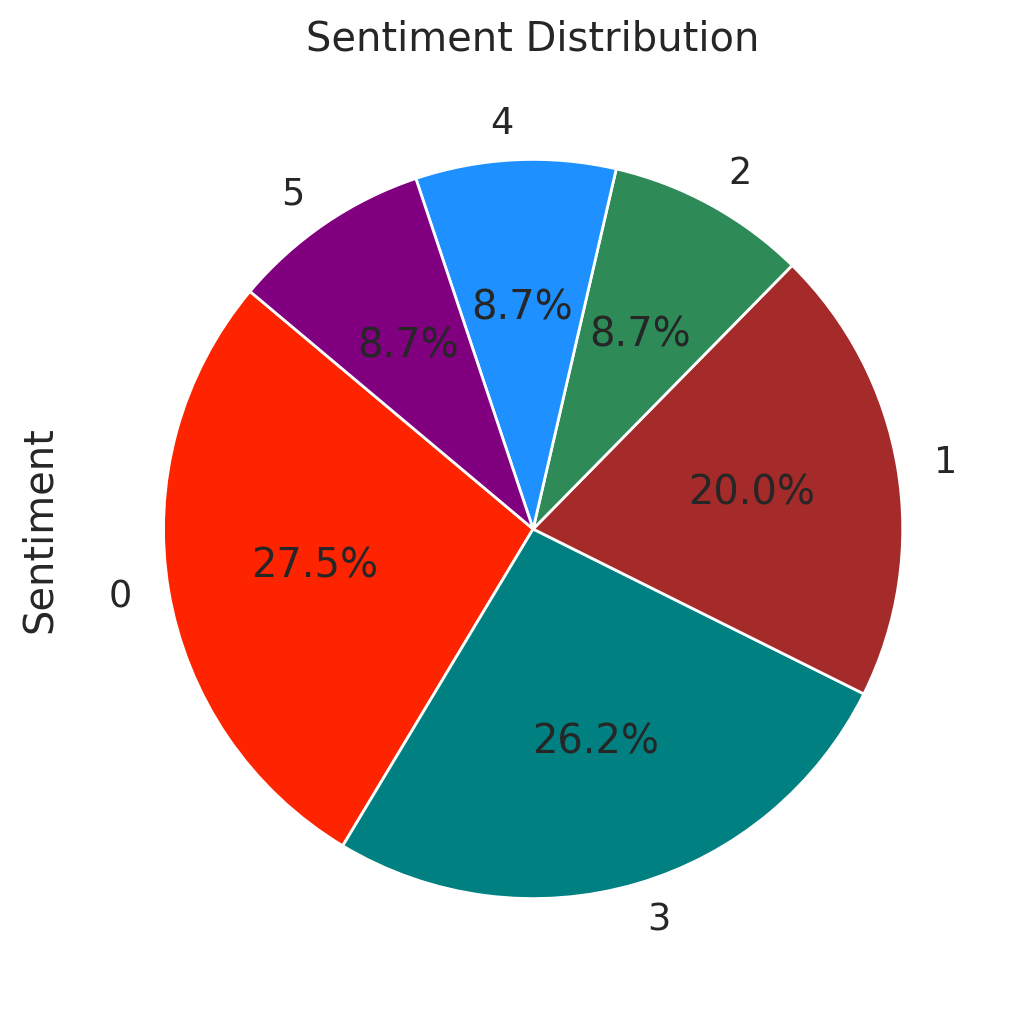

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

custom_palette = ['#FF2400', 'teal', '#A52A2A', 'Seagreen', 'Dodgerblue', 'Purple', 'Gold', 'MediumVioletRed']

# Plotting a pie chart
df1['Sentiment'].value_counts().plot(kind='pie', colors=custom_palette, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sentiment Distribution')

plt.show()


**Visualizes the distribution of text lengths in the dataset using a histogram.**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):

    data['text_length'] = data['Text'].apply(len)

    plt.figure(figsize=(8, 4))

    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    plt.hist(data['text_length'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7, label='Bangla News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    plt.title(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Show the plot
    plt.show()

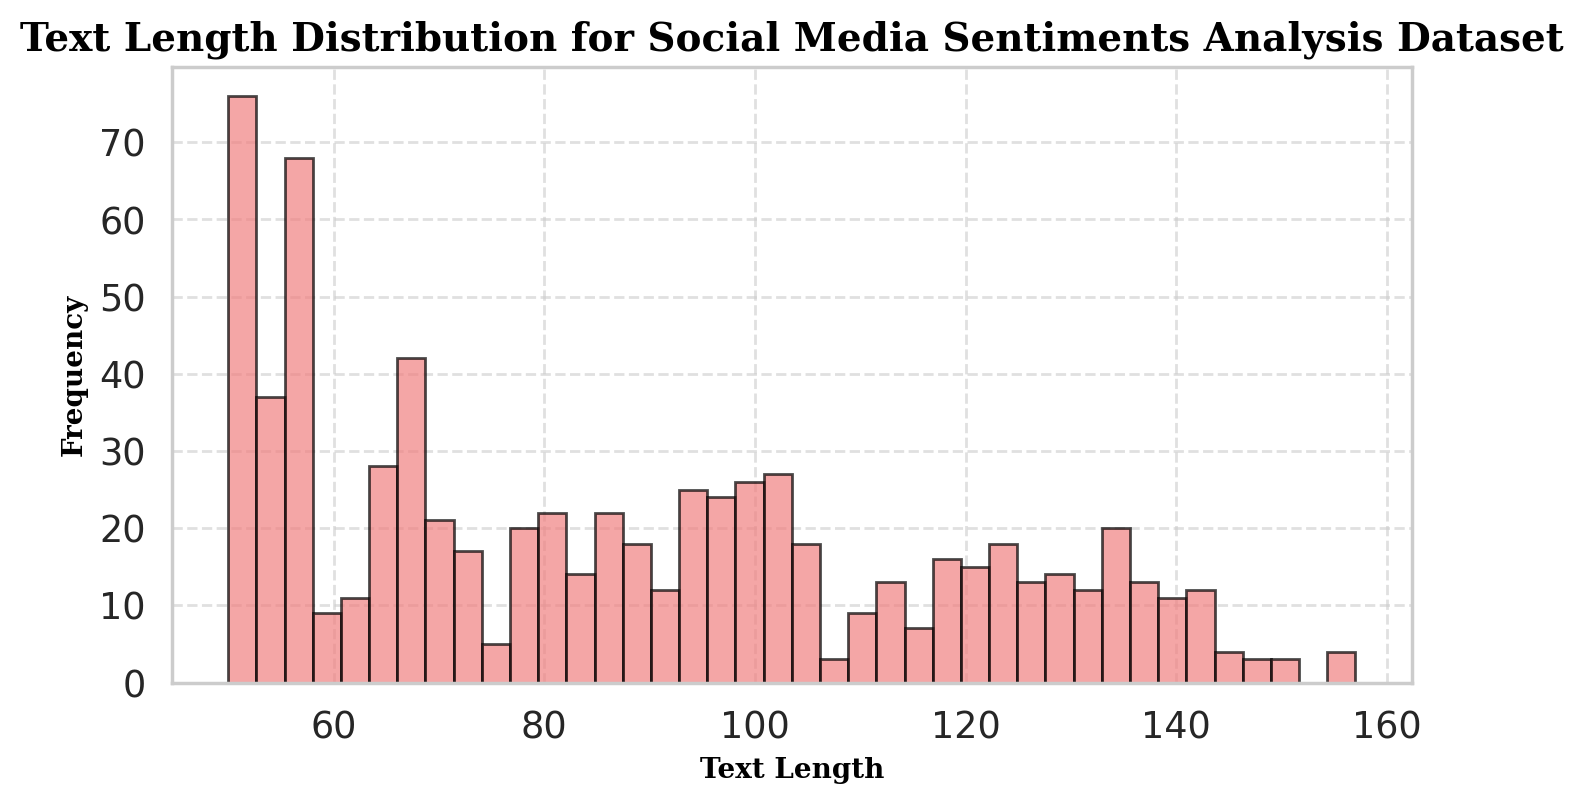

In [ ]:
visualize_text_length(df, 'Social Media Sentiments Analysis Dataset')

**Generates a word cloud to visualize frequently occurring words in the text data.**

In [ ]:
from wordcloud import WordCloud

def create_wordcloud(data, column, title):
    # Specify a Bangla-supported font, such as "Siyam Rupali"



    #This setting disables the detection of collocations (multi-word phrases) to focus on individual words.
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap='turbo', collocations=False).generate(' '.join(data[column]))

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
    plt.axis('off')
    plt.show()

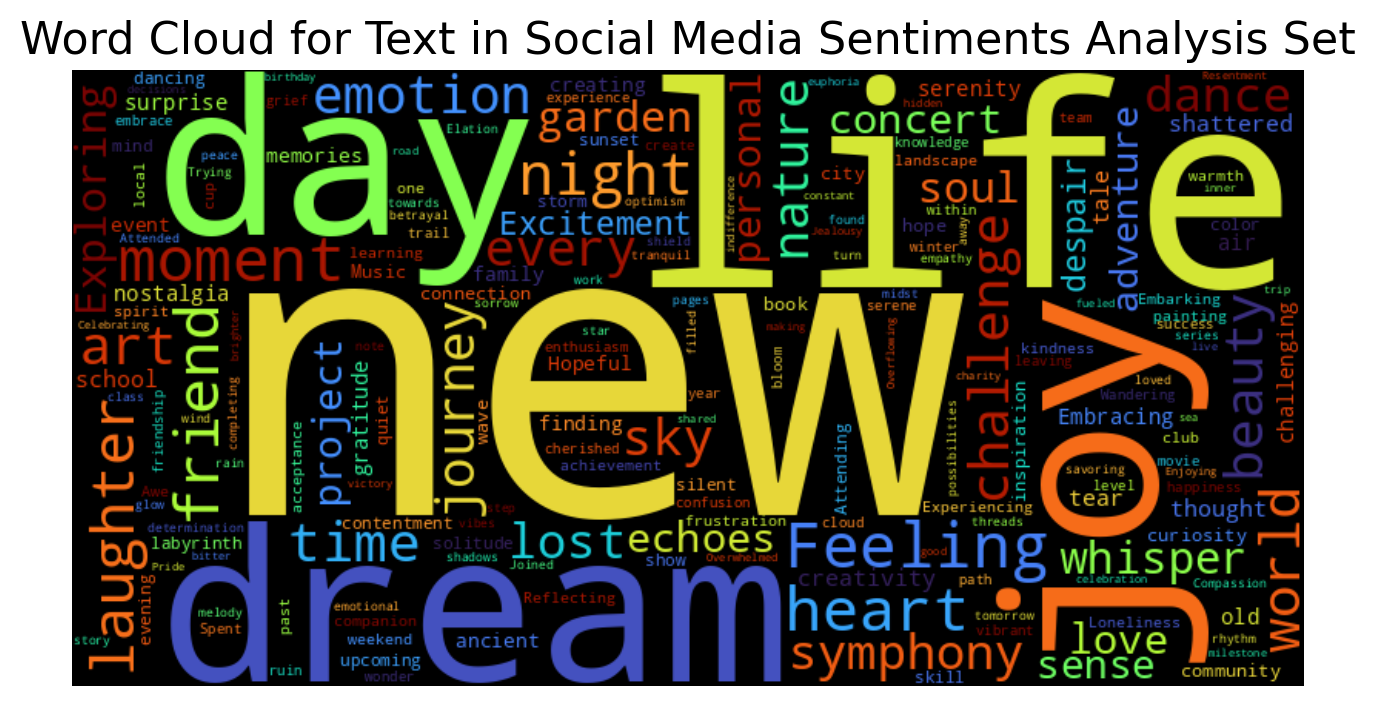

In [ ]:
create_wordcloud(df, 'Text', 'Social Media Sentiments Analysis Set')

**Tokenization**

In [ ]:
from transformers import AutoTokenizer, AutoModel
from transformers import BertForMaskedLM, BertTokenizer, pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
sample_txt = 'Enjoying a beautiful day at the park!'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Enjoying a beautiful day at the park!
   Tokens: ['En', '##joy', '##ing', 'a', 'beautiful', 'day', 'at', 'the', 'park', '!']
Token IDs: [13832, 18734, 1158, 170, 2712, 1285, 1120, 1103, 2493, 106]


In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  truncation=True,
  return_tensors='pt',  # Return PyTorch tensors

)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
token_lens = []

for txt in df.Text:
  #tokenizing the text
      tokens = tokenizer.encode(txt, max_length=512)
      token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


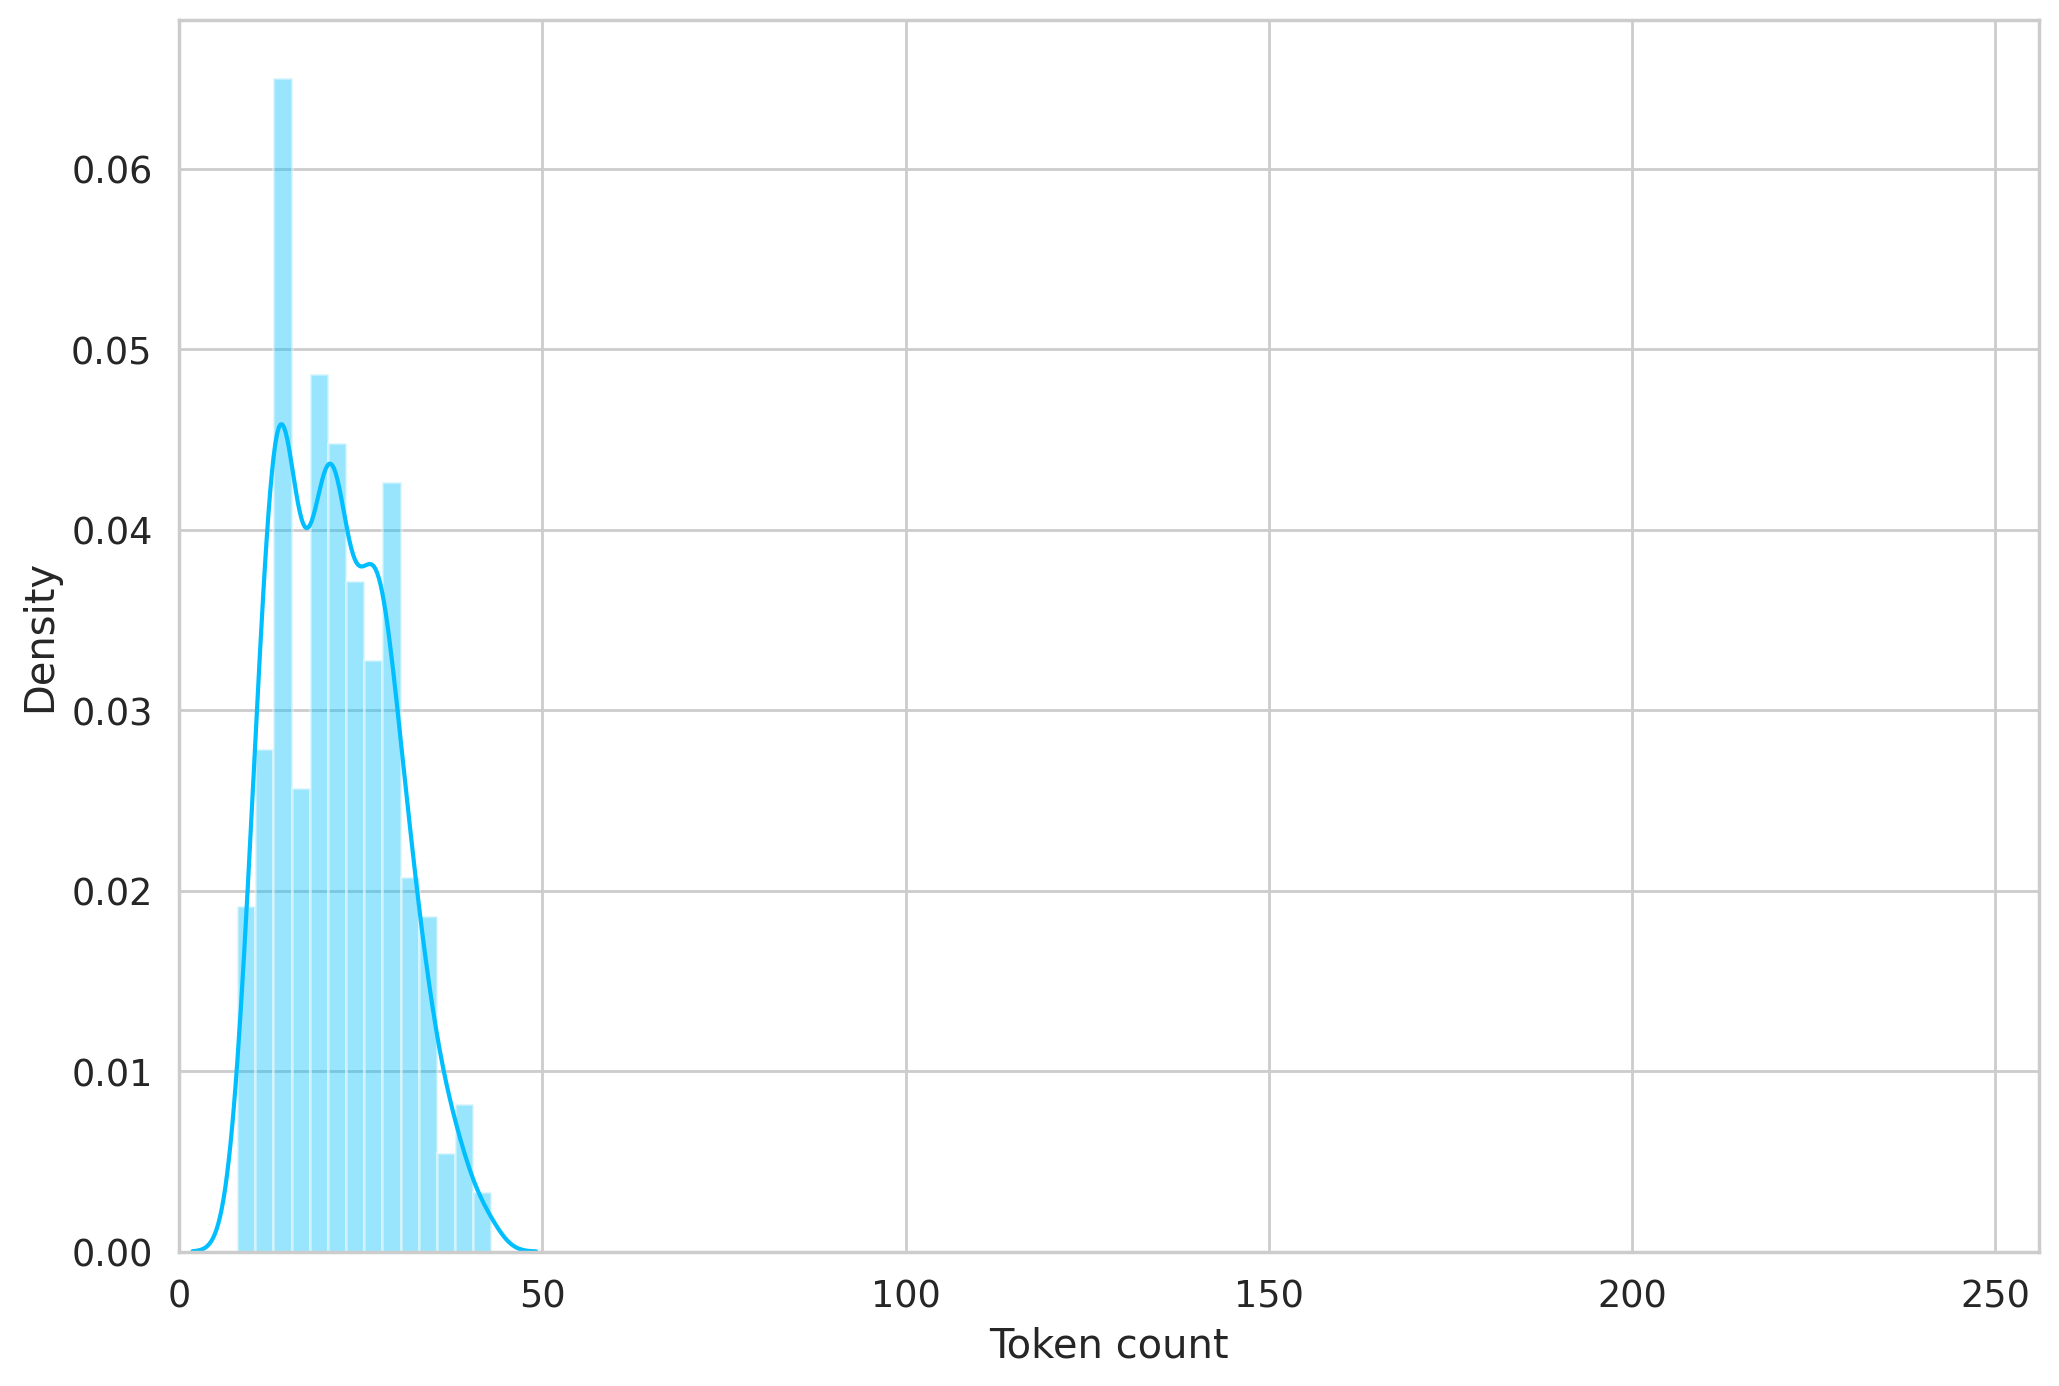

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
selected_columns = ['Text', 'Sentiment']
df = df[selected_columns]
MAX_LEN = 50
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True)
df_val, df_test = train_test_split(df_test, test_size=0.50,shuffle=True)
df_train.shape, df_val.shape, df_test.shape

((512, 2), (110, 2), (110, 2))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.Text.to_numpy(),
    targets=df.Sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len,

  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle=True
  )
BATCH_SIZE = 8

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([8, 50])
torch.Size([8, 50])
torch.Size([8])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME) # method name

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [ ]:
PRE_TRAINED_MODEL_NAME


'bert-base-cased'

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME) #model
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
         input_ids=input_ids,
         attention_mask=attention_mask,
         return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
model = SentimentClassifier(7)
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length


torch.Size([8, 50])
torch.Size([8, 50])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.1040, 0.0852, 0.2574, 0.1479, 0.0924, 0.1714, 0.1417],
        [0.1022, 0.1600, 0.2626, 0.1239, 0.1123, 0.1023, 0.1366],
        [0.0874, 0.0964, 0.1658, 0.2138, 0.1509, 0.1874, 0.0984],
        [0.0765, 0.1326, 0.1270, 0.2457, 0.1660, 0.1782, 0.0740],
        [0.1045, 0.0923, 0.1198, 0.1880, 0.1302, 0.2559, 0.1093],
        [0.1117, 0.0761, 0.2309, 0.2067, 0.0661, 0.2127, 0.0958],
        [0.0700, 0.1056, 0.2089, 0.1878, 0.0688, 0.2269, 0.1320],
        [0.1056, 0.0992, 0.3227, 0.0929, 0.0848, 0.1795, 0.1153]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

**Bert Model**

In [ ]:
EPOCHS = 15

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=4,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
from tqdm import tqdm
import torch.nn as nn
import numpy as np

def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  #tqdm for progress monitoring
  data_loader = tqdm(data_loader, desc="Training", unit="batch")

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    # Update tqdm description with the current loss
    data_loader.set_postfix(loss=np.mean(losses))

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
from tqdm import tqdm
import torch
import numpy as np

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0


    data_loader = tqdm(data_loader, desc="Evaluating", unit="batch")

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

            # Update tqdm description with the current loss
            data_loader.set_postfix(loss=np.mean(losses))

    return correct_predictions.double() / n_examples, np.mean(losses)


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.52batch/s, loss=1.06]


Train loss 1.0649746991693974 accuracy 0.712890625


Evaluating: 100%|██████████| 14/14 [00:01<00:00,  9.20batch/s, loss=0.876]


Val   loss 0.8755953482219151 accuracy 0.7909090909090909

Epoch 2/15
----------


Training: 100%|██████████| 64/64 [00:09<00:00,  6.49batch/s, loss=0.711]


Train loss 0.7108383695594966 accuracy 0.775390625


Evaluating: 100%|██████████| 14/14 [00:02<00:00,  6.90batch/s, loss=0.728]


Val   loss 0.7280280728425298 accuracy 0.7727272727272727

Epoch 3/15
----------


Training: 100%|██████████| 64/64 [00:10<00:00,  6.24batch/s, loss=0.605]


Train loss 0.6054725024005165 accuracy 0.791015625


Evaluating: 100%|██████████| 14/14 [00:01<00:00,  9.51batch/s, loss=0.75]


Val   loss 0.7504197879295263 accuracy 0.8181818181818181

Epoch 4/15
----------


Training: 100%|██████████| 64/64 [00:08<00:00,  7.19batch/s, loss=0.433]


Train loss 0.43290922639425844 accuracy 0.86328125


Evaluating: 100%|██████████| 14/14 [00:02<00:00,  4.88batch/s, loss=0.75]


Val   loss 0.7504016202541867 accuracy 0.8363636363636363

Epoch 5/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.21batch/s, loss=0.322]


Train loss 0.3223989956386504 accuracy 0.892578125


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 10.42batch/s, loss=0.834]


Val   loss 0.8338739244333867 accuracy 0.8363636363636363

Epoch 6/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.87batch/s, loss=0.249]


Train loss 0.24867672933396534 accuracy 0.91796875


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.67batch/s, loss=0.685]


Val   loss 0.6849138946605048 accuracy 0.8090909090909091

Epoch 7/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  9.13batch/s, loss=0.156]


Train loss 0.15573106613192067 accuracy 0.951171875


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.75batch/s, loss=0.825]


Val   loss 0.8246674145172749 accuracy 0.8454545454545455

Epoch 8/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.88batch/s, loss=0.125]


Train loss 0.12544786206672143 accuracy 0.958984375


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 11.11batch/s, loss=0.837]


Val   loss 0.8371788839743074 accuracy 0.8181818181818181

Epoch 9/15
----------


Training: 100%|██████████| 64/64 [00:06<00:00,  9.15batch/s, loss=0.0812]


Train loss 0.08121106235921616 accuracy 0.978515625


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.70batch/s, loss=0.927]


Val   loss 0.9266600485425442 accuracy 0.8363636363636363

Epoch 10/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  9.03batch/s, loss=0.0675]


Train loss 0.06747073763472144 accuracy 0.98046875


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.42batch/s, loss=0.799]


Val   loss 0.7985945124112602 accuracy 0.8454545454545455

Epoch 11/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.88batch/s, loss=0.0449]


Train loss 0.04485793640924385 accuracy 0.986328125


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 11.34batch/s, loss=0.834]


Val   loss 0.8339793471885579 accuracy 0.8636363636363636

Epoch 12/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.88batch/s, loss=0.0297]


Train loss 0.02971457105650188 accuracy 0.99609375


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.24batch/s, loss=0.83]


Val   loss 0.8303403100123562 accuracy 0.8636363636363636

Epoch 13/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.08batch/s, loss=0.023]


Train loss 0.023044357657454384 accuracy 0.998046875


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.72batch/s, loss=0.86]


Val   loss 0.8596001710726081 accuracy 0.8545454545454545

Epoch 14/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  8.89batch/s, loss=0.0155]


Train loss 0.015531327199823863 accuracy 0.998046875


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 13.53batch/s, loss=0.83]


Val   loss 0.8304192740969094 accuracy 0.8545454545454545

Epoch 15/15
----------


Training: 100%|██████████| 64/64 [00:07<00:00,  9.02batch/s, loss=0.0136]


Train loss 0.013628264163344284 accuracy 1.0


Evaluating: 100%|██████████| 14/14 [00:01<00:00, 10.06batch/s, loss=0.865]

Val   loss 0.8654345892386378 accuracy 0.8545454545454545

CPU times: user 1min 27s, sys: 25.3 s, total: 1min 52s
Wall time: 2min 29s


               precision    recall  f1-score   support

   Positive         0.57      0.44      0.50         9
  Excitement        0.11      0.50      0.18         2
 Contentment        0.00      0.00      0.00         2
         Joy        0.50      0.33      0.40         6
     Neutral        0.00      0.00      0.00         1
       Happy        0.00      0.00      0.00         2
Miscellaneous       0.91      0.93      0.92        88

     accuracy                           0.81       110
    macro avg       0.30      0.32      0.29       110
 weighted avg       0.80      0.81      0.80       110



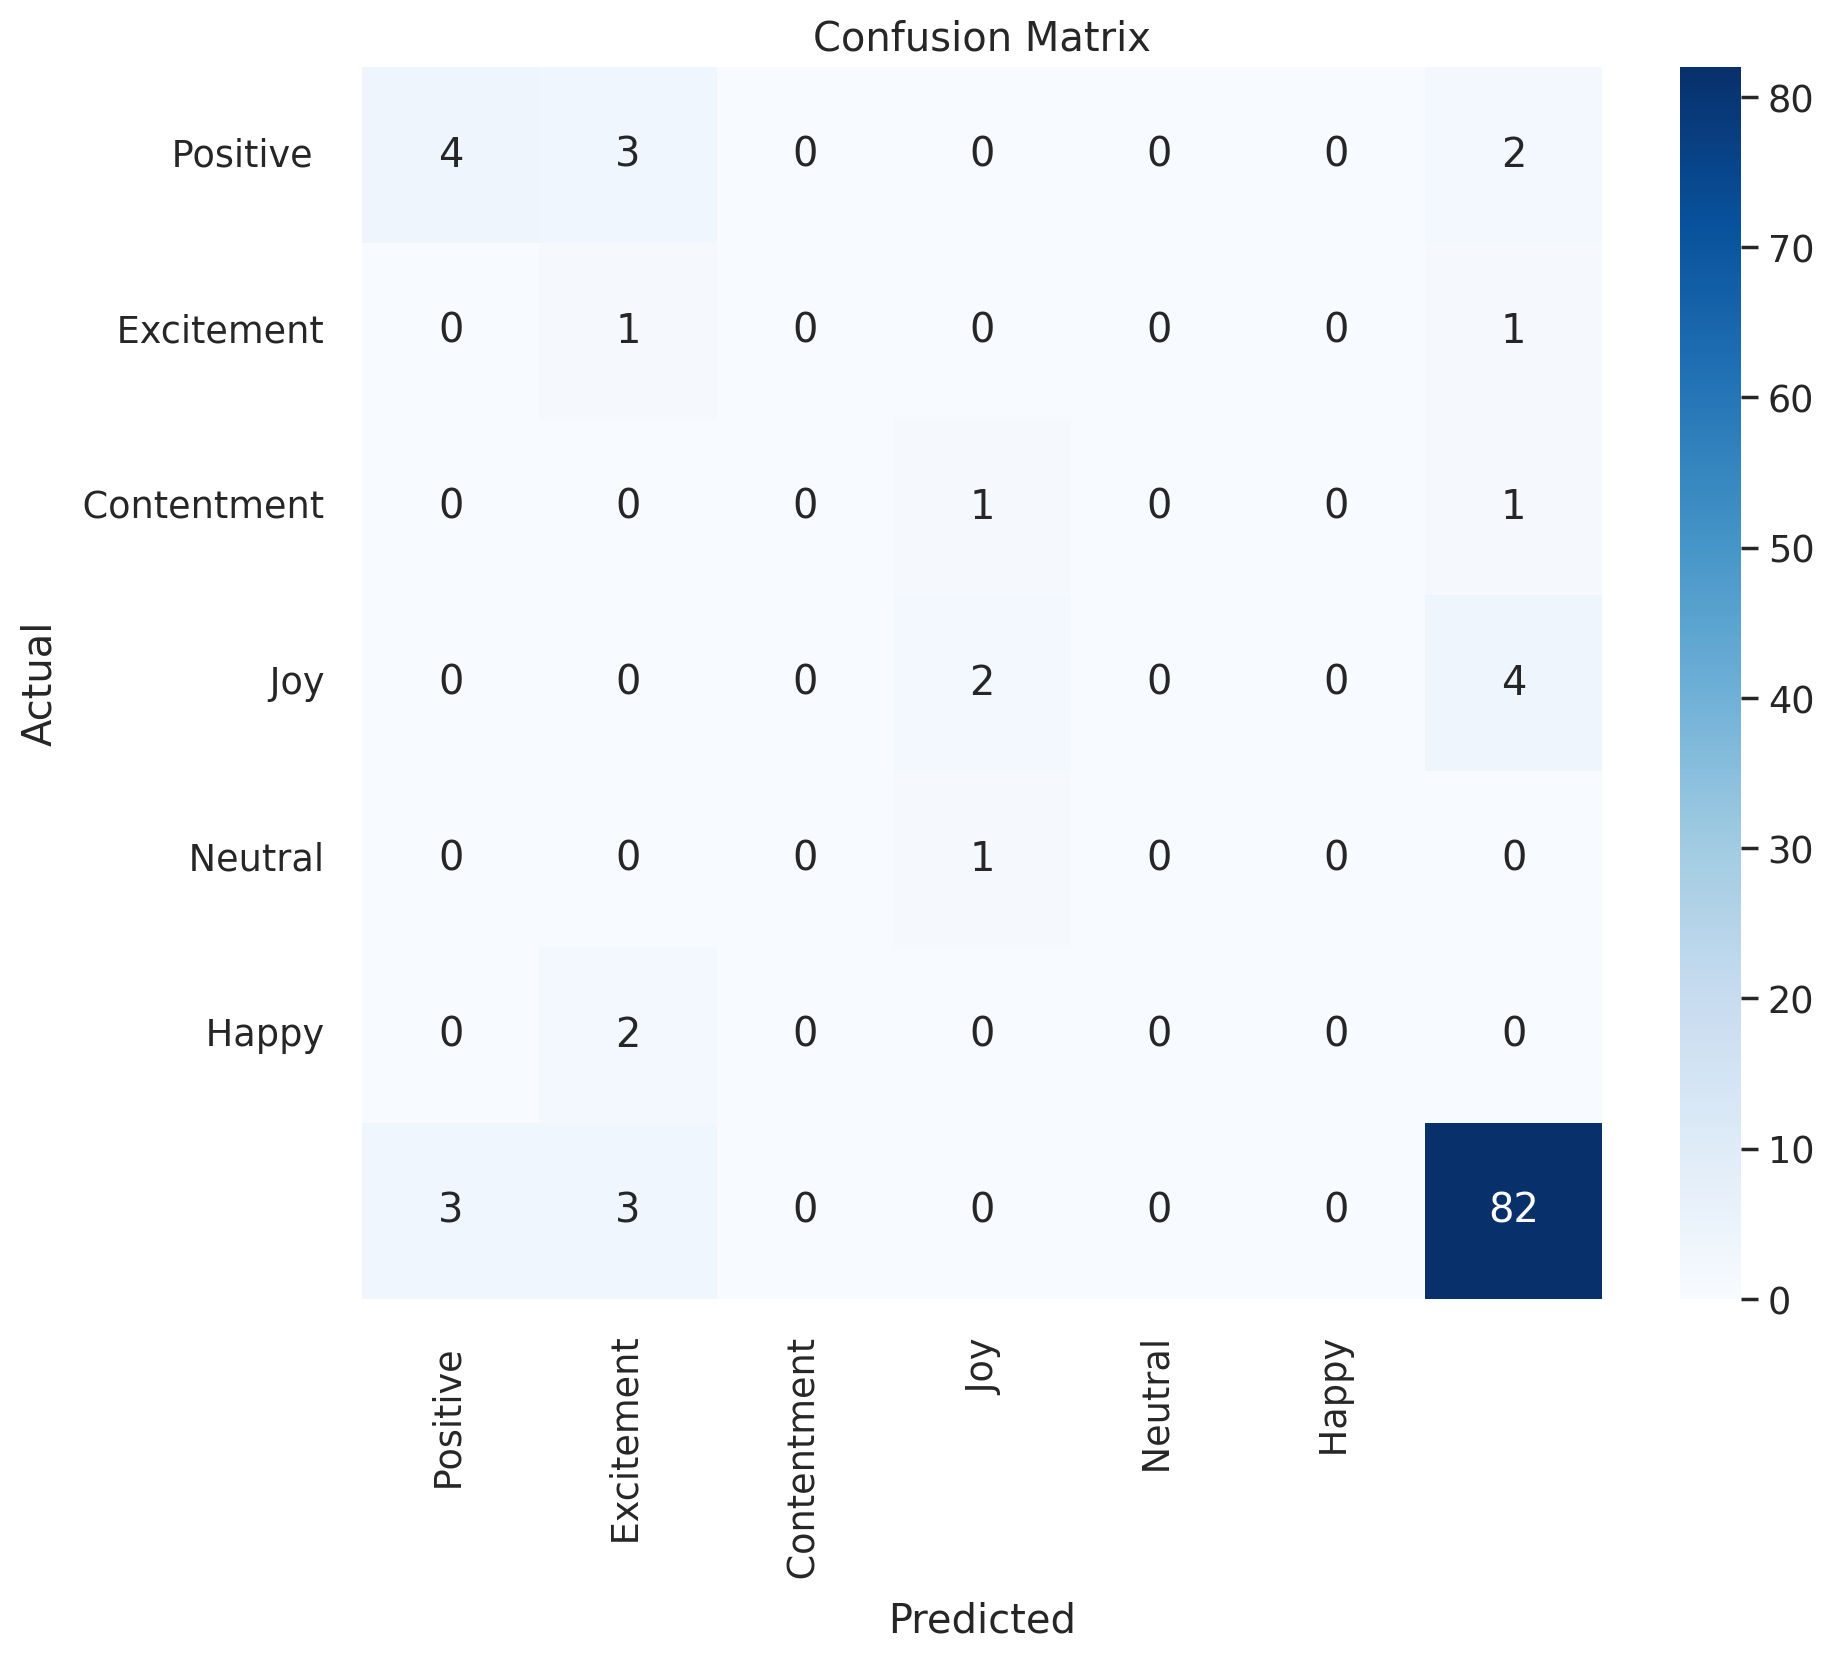

In [ ]:
# Load the trained model
model = SentimentClassifier(7)  # Assuming 7 sentiment classes
model.load_state_dict(torch.load('/content/best_model_state.bin'))  # Load your trained model
model = model.to(device)
model.eval()

# Evaluate the model on test data
all_predictions = []
all_targets = []

with torch.no_grad():
    for batch in test_data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        targets = batch['targets'].to(device)

        outputs = model(input_ids, attention_mask)
        _, predicted = torch.max(outputs, dim=1)

        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Convert predictions and targets to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Print classification report
# Define class names including all sentiment classes
class_names = [" Positive  ", " Excitement ", " Contentment ", " Joy ", " Neutral ", " Happy ", "Miscellaneous"]

# Print classification report
print(classification_report(all_targets, all_predictions, target_names=class_names))


# Visualize confusion matrix
conf_mat = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names[:-1], yticklabels=class_names[:-1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(all_targets, all_predictions)

# Print accuracy with two decimal points
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 80.91%


**Hybrid Model**

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
----------
Train loss 0.987226546742022 accuracy 0.75
Val   loss 0.8499259405902454 accuracy 0.7909090909090909

Epoch 2/20
----------
Train loss 0.6857363079907373 accuracy 0.771484375
Val   loss 1.0009122959205083 accuracy 0.6636363636363636

Epoch 3/20
----------
Train loss 0.633535920176655 accuracy 0.787109375
Val   loss 0.6495057544005769 accuracy 0.7818181818181817

Epoch 4/20
----------
Train loss 0.430694291862892 accuracy 0.84375
Val   loss 0.7254575948630061 accuracy 0.7999999999999999

Epoch 5/20
----------
Train loss 0.3422584361687768 accuracy 0.857421875
Val   loss 0.8132472102131162 accuracy 0.7363636363636363

Epoch 6/20
----------
Train loss 0.23260874323750613 accuracy 0.939453125
Val   loss 0.7601983211934566 accuracy 0.8272727272727273

Epoch 7/20
----------
Train loss 0.17591951205395162 accuracy 0.943359375
Val   loss 0.78183392648186 accuracy 0.7999999999999999

Epoch 8/20
----------
Train loss 0.11841125049613765 accuracy 0.982421875
Val   loss 0.771

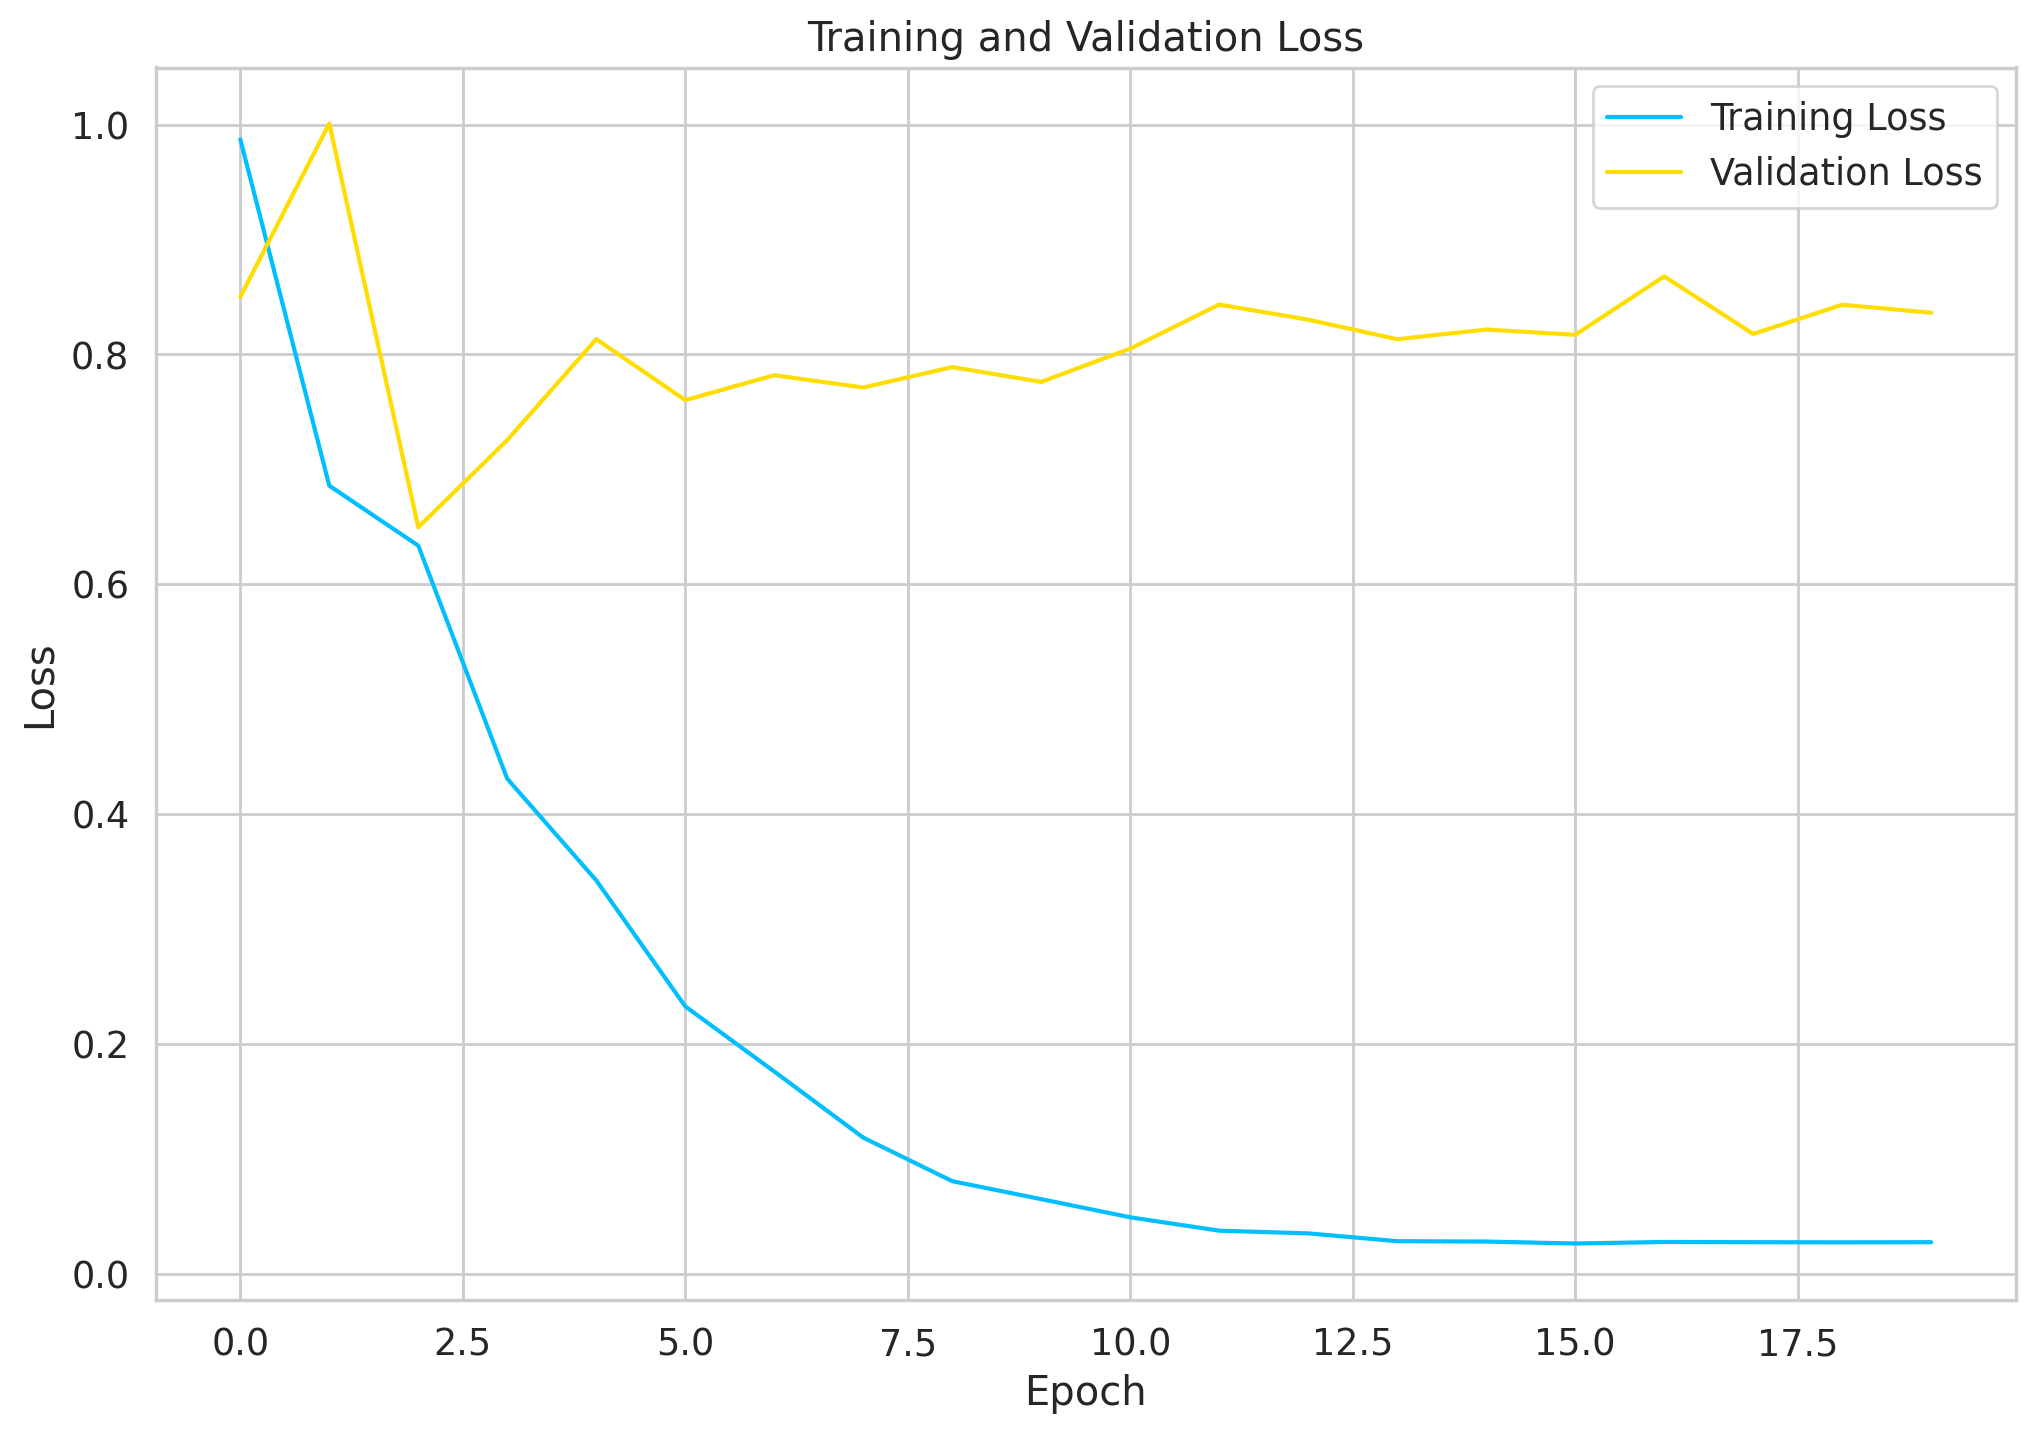

In [ ]:
from transformers import AutoModel, AutoTokenizer
from transformers import BertModel, BertTokenizer
from transformers import RobertaModel, RobertaTokenizer
import torch.nn.functional as F

# Define the class for the hybrid model
class HybridSentimentClassifier(nn.Module):

    def __init__(self, n_classes):
        super(HybridSentimentClassifier, self).__init__()

        # Load BERT model and tokenizer
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

        # Load RoBERTa model and tokenizer
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

        # Dropout layer
        self.drop = nn.Dropout(p=0.3)

        # Output layer
        self.out = nn.Linear(self.bert.config.hidden_size + self.roberta.config.hidden_size, n_classes)

    def forward(self, input_ids_bert, attention_mask_bert, input_ids_roberta, attention_mask_roberta):
        # BERT model forward pass
        _, pooled_output_bert = self.bert(
             input_ids=input_ids_bert,
             attention_mask=attention_mask_bert,
             return_dict=False
        )

        # RoBERTa model forward pass
        _, pooled_output_roberta = self.roberta(
             input_ids=input_ids_roberta,
             attention_mask=attention_mask_roberta,
             return_dict=False
        )

        # Concatenate pooled outputs from BERT and RoBERTa
        pooled_output = torch.cat((pooled_output_bert, pooled_output_roberta), dim=1)

        # Apply dropout
        output = self.drop(pooled_output)

        # Output layer
        return self.out(output)

# Instantiate the hybrid model
hybrid_model = HybridSentimentClassifier(7)

# Move model to appropriate device (CPU or GPU)
hybrid_model = hybrid_model.to(device)

# Define optimizer and learning rate scheduler
optimizer = optim.AdamW(hybrid_model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Define loss function
loss_fn = nn.CrossEntropyLoss().to(device)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids_bert = d["input_ids"].to(device)
        attention_mask_bert = d["attention_mask"].to(device)
        input_ids_roberta = d["input_ids"].to(device)
        attention_mask_roberta = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        # Forward pass
        outputs = model(input_ids_bert, attention_mask_bert, input_ids_roberta, attention_mask_roberta)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Metrics
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids_bert = d["input_ids"].to(device)
            attention_mask_bert = d["attention_mask"].to(device)
            input_ids_roberta = d["input_ids"].to(device)
            attention_mask_roberta = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids_bert, attention_mask_bert, input_ids_roberta, attention_mask_roberta)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)
import matplotlib.pyplot as plt

def plot_loss(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Define number of epochs
EPOCHS = 20
# Training loop
train_losses = []
val_losses = []
best_accuracy = 0
for epoch in range(EPOCHS):

    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        hybrid_model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    train_losses.append(train_loss)

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        hybrid_model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    val_losses.append(val_loss)

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()

    # Check if validation accuracy is the best so far
    if val_acc > best_accuracy:
        torch.save(hybrid_model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

# Load the best model state
hybrid_model.load_state_dict(torch.load('best_model_state.bin'))

# Evaluate on test data
test_acc, _ = eval_model(
    hybrid_model,
    test_data_loader,
    loss_fn,
    device,
    len(df_test)
)

print(f'Test accuracy {test_acc.item()}')

# Plot training and validation loss
plot_loss(train_losses, val_losses)


               precision    recall  f1-score   support

     Positive       0.50      0.33      0.40         9
   Excitement       0.50      0.50      0.50         2
  Contentment       0.00      0.00      0.00         2
          Joy       0.40      0.33      0.36         6
      Neutral       1.00      1.00      1.00         1
        Happy       0.00      0.00      0.00         2
Miscellaneous       0.85      0.93      0.89        88

     accuracy                           0.81       110
    macro avg       0.46      0.44      0.45       110
 weighted avg       0.76      0.81      0.78       110



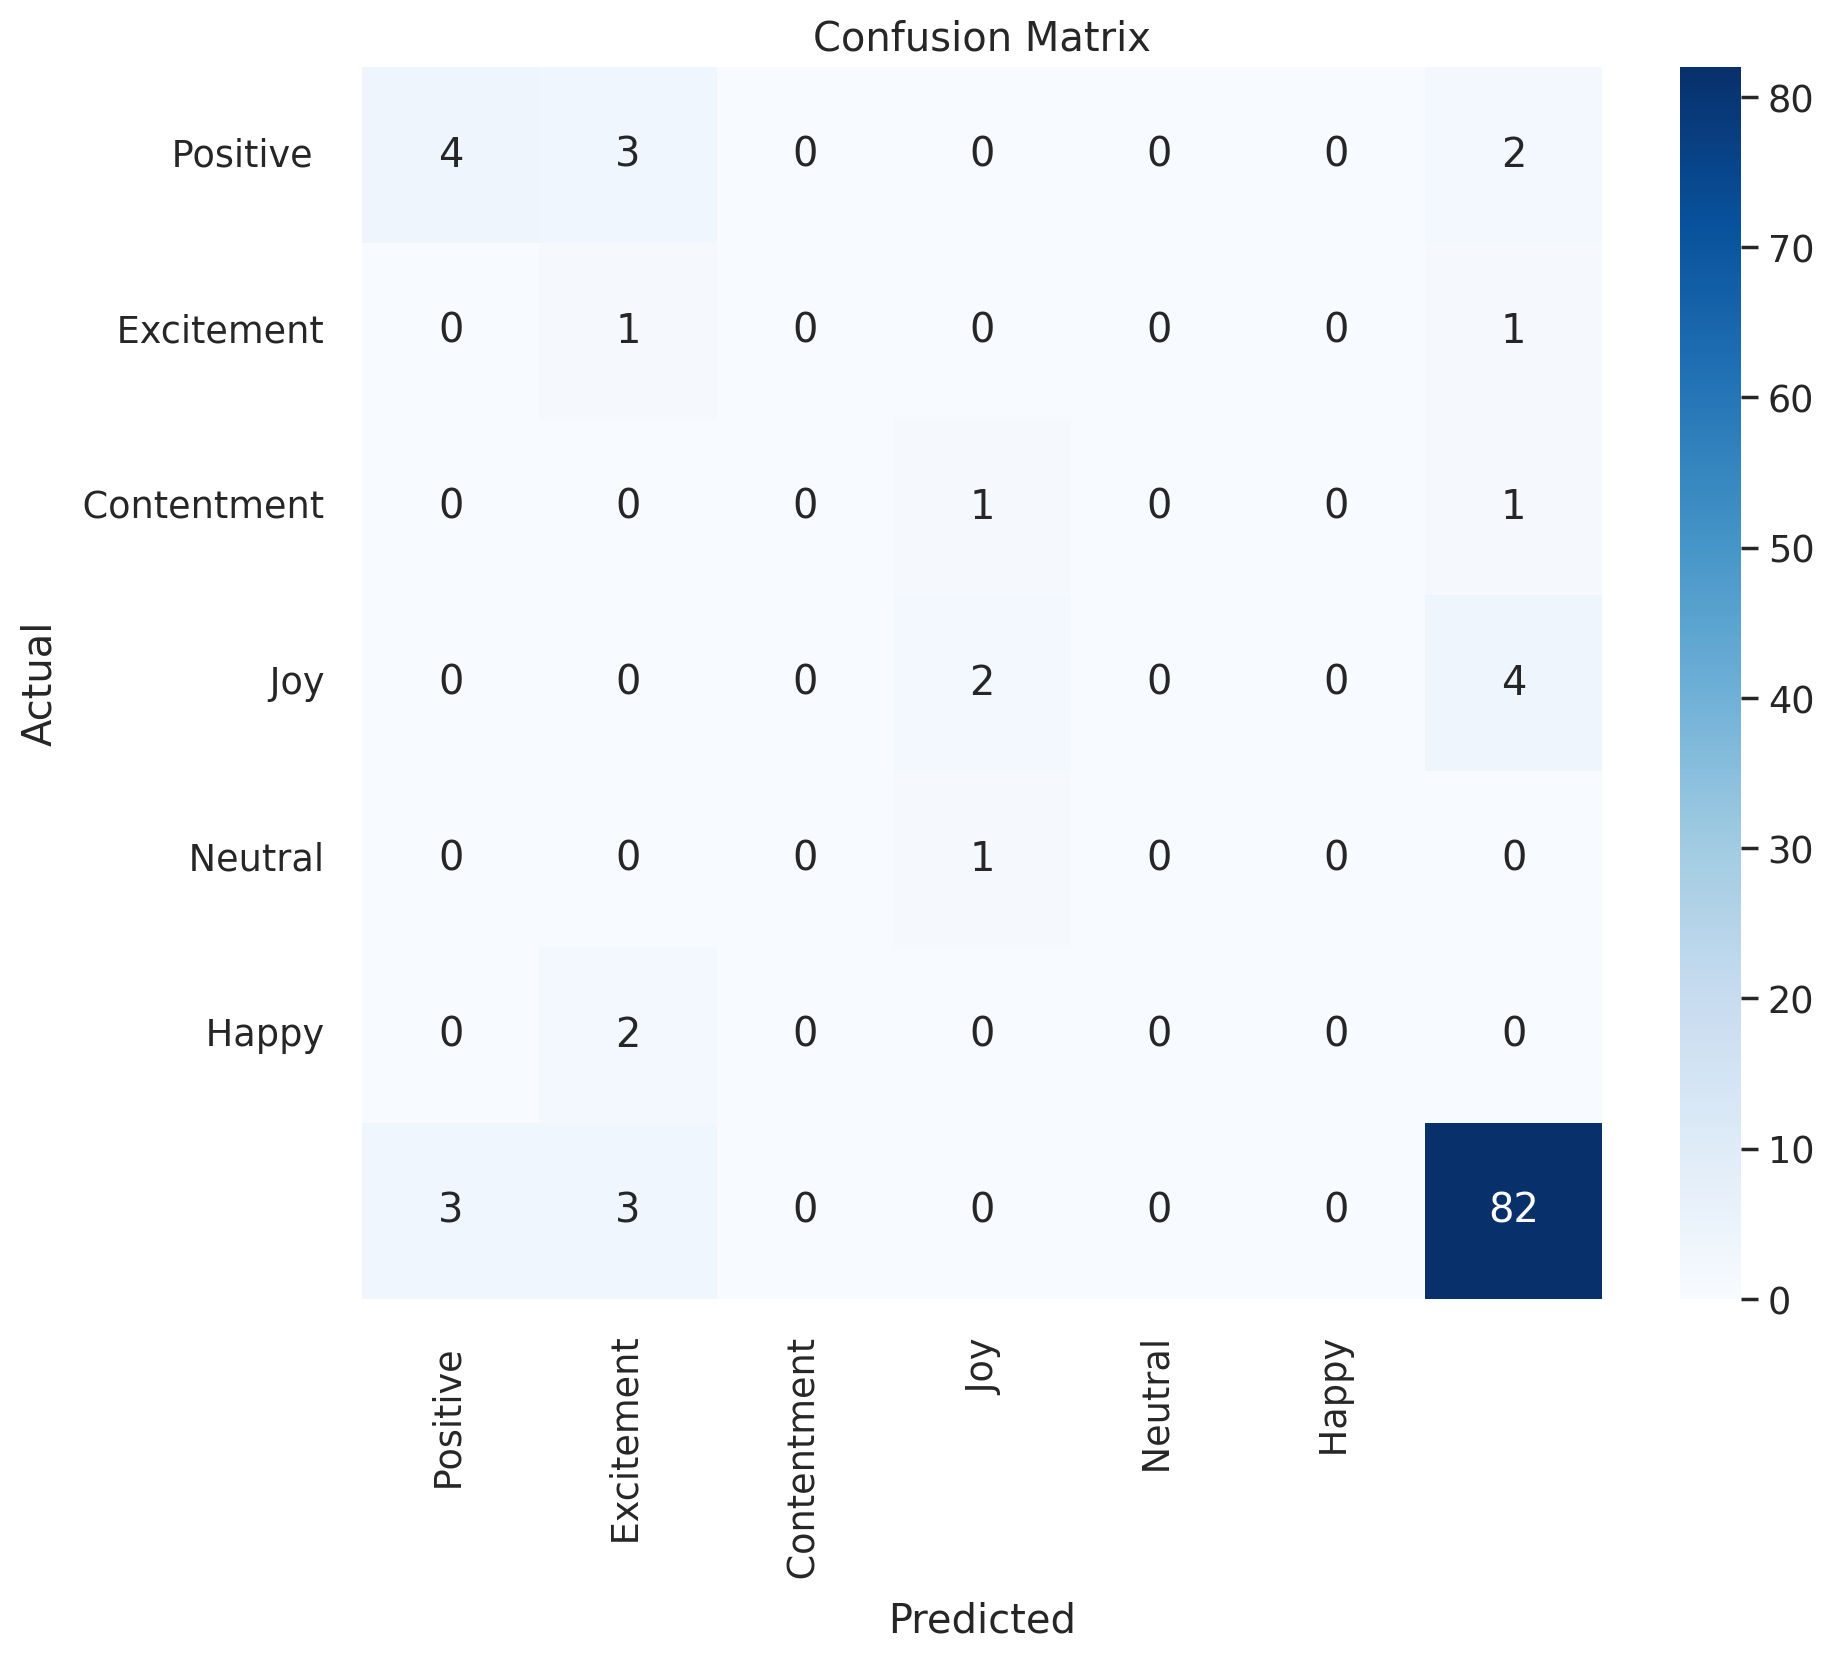

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def get_predictions(model, data_loader):
    model = model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for d in data_loader:
            input_ids_bert = d["input_ids"].to(device)
            attention_mask_bert = d["attention_mask"].to(device)
            input_ids_roberta = d["input_ids"].to(device)
            attention_mask_roberta = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids_bert, attention_mask_bert, input_ids_roberta, attention_mask_roberta)
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds.tolist())
            true_labels.extend(targets.tolist())

    return predictions, true_labels

# Get predictions and true labels
predictions, true_labels = get_predictions(hybrid_model, test_data_loader)

# Define class labels
class_labels = ['Positive', 'Excitement', 'Contentment', 'Joy', 'Neutral', 'Happy', 'Miscellaneous']

# Print classification report
print(classification_report(true_labels, predictions, target_names=class_labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Visualize confusion matrix
conf_mat = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names[:-1], yticklabels=class_names[:-1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
from transformers import BertTokenizer, BertModel, RobertaTokenizer, RobertaModel
from torch import nn
from torch.nn import functional as F

class HybridModel(nn.Module):
    def __init__(self, bert_model_name, roberta_model_name, num_classes):
        super(HybridModel, self).__init__()

        # Load BERT and RoBERTa models
        self.bert_model = BertModel.from_pretrained(bert_model_name)
        self.roberta_model = RobertaModel.from_pretrained(roberta_model_name)

        # Classifier layer
        self.classifier = nn.Linear(self.bert_model.config.hidden_size + self.roberta_model.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        # Get BERT output
        bert_output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        bert_last_hidden_state = bert_output.last_hidden_state

        # Get RoBERTa output
        roberta_output = self.roberta_model(input_ids=input_ids, attention_mask=attention_mask)
        roberta_last_hidden_state = roberta_output.last_hidden_state

        # Concatenate the output embeddings
        combined_output = torch.cat((bert_last_hidden_state, roberta_last_hidden_state), dim=2)

        # Classifier layer
        output = self.classifier(combined_output[:, 0, :])  # Take the first token's output for classification

        return output

# Example usage:
num_classes = 3  # Assuming 3 classes for sentiment analysis (Negative, Neutral, Positive)
bert_model_name = "bert-base-uncased"
roberta_model_name = "roberta-base"
tokenizer_bert = BertTokenizer.from_pretrained(bert_model_name)
tokenizer_roberta = RobertaTokenizer.from_pretrained(roberta_model_name)

# Sample input
sentence = "Excited about the upcoming weekend getaway!"

# Tokenize input
inputs_bert = tokenizer_bert(sentence, return_tensors='pt', truncation=True, padding=True)
inputs_roberta = tokenizer_roberta(sentence, return_tensors='pt', truncation=True, padding=True)

# Initialize and forward through the hybrid model
model = HybridModel(bert_model_name, roberta_model_name, num_classes)
output = model(input_ids=inputs_bert['input_ids'], attention_mask=inputs_bert['attention_mask'])

# Assuming 'labels' is defined somewhere
labels = ['Negative', 'Neutral', 'Positive']
predicted_label_idx = torch.argmax(output).item()
predicted_label = labels[predicted_label_idx]

print(f"Sentence: {sentence}\nPredicted Sentiment: {predicted_label}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentence: Excited about the upcoming weekend getaway!
Predicted Sentiment: Positive
